
- Many physical processes look random.  
- Radioactive decay: impossible to predict when a particular radioactive atom will decay.  Quantum mechanics give probability of decay per unit time, but the exact moment appears to be random.
- Brownian motion is the apparent random motion of particles in air. 
- Processes that appear to be random can be modeled as such.
- Need a computational method for simulating random processes!

## Random number generators

- Use *pseudorandom* numbers generated by a deterministic formula, i.e., numbers are not truly random, they just appear to be so.  The formula is a *random number generator*.
- Consider the following formula,
\begin{equation*}
x^\prime = (ax + c)\mod m
\end{equation*}
where $a$, $c$, and $m$ are integer constants and $x$ is an integer variable.  
- Use $x$ as a *seed* and iterate this equation (replacing $x$ with $x^\prime$) to produce a stream of random numbers. 
- Note that with the same *seed* value, the sequence is identical every time because this is a deterministic formula.

<function matplotlib.pyplot.show>

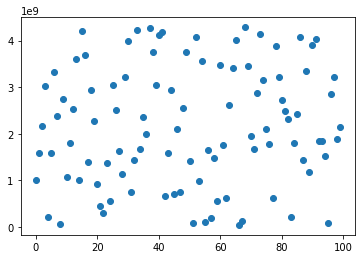

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def RNG(x,N):  #Random number generator
    a = 1664525
    c = 1013904223
    m = 4294967296
    results = []
    for i in range(N):
        x  = (a*x + c)%m
        results.append(x)
    return results

N = 100
x = 1

results = RNG(x,N)
plt.plot(results,"o")
plt.show

- As the plot shows, the numbers "appear" to be random.
- This is called a *linear congruential random number generator*.
- If we run the program again, we get the same set of numbers, but the numbers may be sufficiently random to model physical processes. 
- A different set of random numbers would be generated with a different *seed* value. 
- The numbers generated are always positive and fall in the range 0 to $m-1$.
- Typically, it would be more useful to have the random numbers in the range $0 \le r < 1$.  In this case, divide by $m$.


<function matplotlib.pyplot.show>

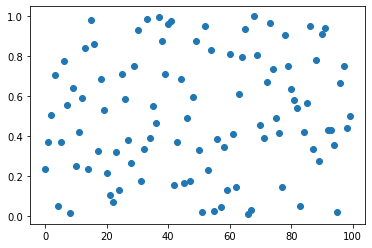

In [ ]:
def RNG_norm(x,N):  #Random number generator
    a = 1664525
    c = 1013904223
    m = 4294967296
    results = []
    for i in range(N):
        x  = (a*x + c)%m
        results.append(x/m)
    return results

results = RNG_norm(x,N)
plt.plot(results,"o")
plt.show

- Now change the seed.

<function matplotlib.pyplot.show>

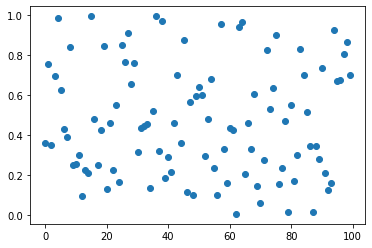

In [ ]:
seed = 325
results = RNG_norm(seed,N)
plt.plot(results,"o")
plt.show

- It matters what values to choose for $a$, $c$, and $m$.  These values are not arbitrary, but were chosen with some care to produce adequate results. 
- If $c$ and $m$ were both chosen to be even, then the process would generate only even numbers or only odd numbers.
- Unfortunately, the *linear congruential generator* has some serious flaws.
- There are some correlations between values of successive numbers.  True random numbers would be uncorrelated.
- Critical to use quality random number generators with little or no correlations!
- We will use Python's random number generators based on the *Mersenne Twister* -- details omitted here due to complexity. 

In [ ]:
import random as rnd

rnd.seed(1324)
print(rnd.random())

np.random.seed(463)
print(np.random.rand())

0.46946676407257637
0.8088015550332983


- What happens if the seed is not specified?  Seed is set using the system clock.  The seed is set by default when the module is first imported.

In [14]:
import random as rnd
import time

print(rnd.random())

seed = np.long(time.time() * 256)
print('seed =', seed)
rnd.seed(seed)
print(rnd.random())


0.4138649040586224
seed = 405804016623
0.3011637313895583


In [20]:
for _ in range(10):
    print(rnd.random())

0.19028140575589259
0.5507360698619848
0.780001678543682
0.830915913344402
0.9080827282335885
0.7698334816399306
0.23511200080947758
0.10972582720840918
0.9856914906377963
0.9963794553069595


In [22]:
for _ in range(10):
    print(rnd.randint(1,10))

2
7
9
6
9
9
8
9
5
10


In [28]:
for _ in range(10):
    print(rnd.randrange(0,10))

8
5
1
1
5
0
0
4
0
9


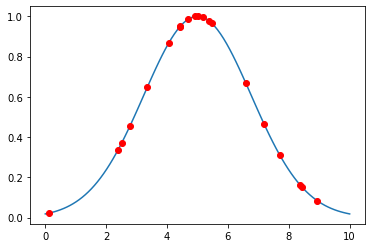

In [34]:
x = np.linspace(0,10,100)
mu = 5.0     #mean
sigma = 2.5  #STD
plt.plot(x,np.exp(-(x-mu)**2/sigma**2))

for _ in range(20):
    r = rnd.gauss(mu,sigma)
    plt.plot(r,np.exp(-(r-mu)**2/sigma**2),'ro')
    